<a href="https://colab.research.google.com/github/noahruiz416/Airline_On_Time_AZ_Market/blob/main/Tempe_Traffic_Prototype_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This Notebook is the initial prototype for the Tempe Traffic Classification Project. Within this file you will find various sections that conduct exploratory analysis, feature selection, initial models and more. This specific notebook is the second version of the Original Prototype, with substanial changes

## Exploratory Data Analysis V.2

In [14]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np
sns.set_style("darkgrid")

In [9]:
no_null_vals = pd.read_csv("no_null_vals_df.csv")
null_vals = pd.read_csv("null_vals_df.csv")

In [10]:
null_vals['Injuryseverity'].value_counts()

No Injury                    27473
Possible Injury               5894
Non Incapacitating Injury     4411
Suspected Minor Injury        1357
Incapacitating Injury          559
Suspected Serious Injury       124
Fatal                           99
Name: Injuryseverity, dtype: int64

In [12]:
#counting how many nulls, tends to be quite a lot of missing values, which may be in apart to accidents involving one person
#this will be explored later through various approaches
null_vals.isnull().sum()

X                       138
Y                       138
OBJECTID                  0
Incidentid                0
DateTime                  0
Year                      0
StreetName               19
CrossStreet              41
Distance                  0
JunctionRelation          0
Totalinjuries             0
Totalfatalities           0
Injuryseverity            0
Collisionmanner           0
Lightcondition            0
Weather                   0
SurfaceCondition          0
Unittype_One              0
Age_Drv1                 33
Gender_Drv1             669
Traveldirection_One       0
Unitaction_One            0
Violation1_Drv1          33
AlcoholUse_Drv1          33
DrugUse_Drv1             33
Unittype_Two           2446
Age_Drv2               3458
Gender_Drv2            3537
Traveldirection_Two    2446
Unitaction_Two         2446
Violation1_Drv2        3458
AlcoholUse_Drv2        3458
DrugUse_Drv2           3458
Latitude                138
Longitude               138
dtype: int64

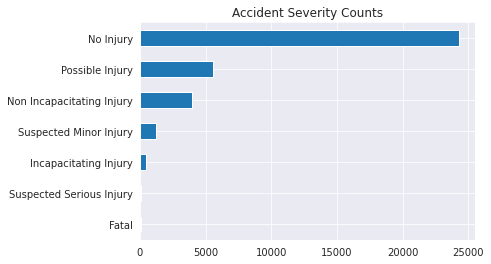

In [15]:
#distribution of y variable injruy severity for no null value data
no_null_vals['Injuryseverity'].value_counts().sort_values().plot.barh(title = 'Accident Severity Counts')

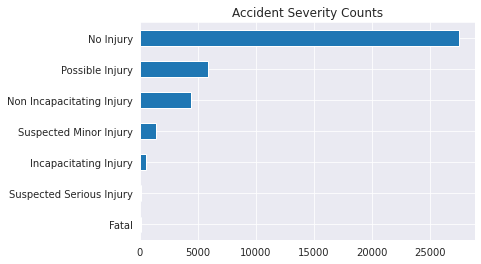

In [16]:
#distribution of injruy severity for null valued data, seems to be that the overlying distrubtion of classes remains the same
null_vals['Injuryseverity'].value_counts().sort_values().plot.barh(title = 'Accident Severity Counts')

In [102]:
#helper function to count fatal or non fatal counts, we will use this to compare distributions of values across datasets
#using this to check whether or not our assumption is naive
def count_fatal(data_frame, column_name, key_name):
  return_true = []
  return_false = []
  for classes in data_frame[column_name]:
    if classes != key_name: 
      return_false.append(classes)
    else:
      return_true.append(classes)
  values = {f"Matching '{key_name}' Values": len(return_true),
            f"Non Matching '{key_name}'' Values": len(return_false),
            "Percent of Matching - Non Matching": f"{round((len(return_true) / (len(return_false) + len(return_true))) * 100, 4)}%"}
  return values

In [103]:
#as shown in vizualizations the distribution of fatal vs non fatal injuries remains the same in either dataset
count_fatal(no_null_vals, 'Injuryseverity', 'Fatal')

{"Matching 'Fatal' Values": 80,
 "Non Matching 'Fatal'' Values": 35647,
 'Percent of Matching - Non Matching': '0.2239%'}

In [104]:
count_fatal(null_vals, 'Injuryseverity', 'Fatal')

{"Matching 'Fatal' Values": 99,
 "Non Matching 'Fatal'' Values": 39818,
 'Percent of Matching - Non Matching': '0.248%'}

In [ ]:
#exploring No Injury

In [107]:
count_fatal(no_null_vals, 'Injuryseverity', 'No Injury') #non null values

{"Matching 'No Injury' Values": 24272,
 "Non Matching 'No Injury'' Values": 11455,
 'Percent of Matching - Non Matching': '67.9374%'}

In [108]:
count_fatal(null_vals, 'Injuryseverity', 'No Injury') #null values

{"Matching 'No Injury' Values": 27473,
 "Non Matching 'No Injury'' Values": 12444,
 'Percent of Matching - Non Matching': '68.8253%'}

In [111]:
#Exploring Possible Injury

In [109]:
count_fatal(no_null_vals, 'Injuryseverity', 'Possible Injury') #non null values

{"Matching 'Possible Injury' Values": 5558,
 "Non Matching 'Possible Injury'' Values": 30169,
 'Percent of Matching - Non Matching': '15.5569%'}

In [110]:
count_fatal(null_vals, 'Injuryseverity', 'Possible Injury') #null values

{"Matching 'Possible Injury' Values": 5894,
 "Non Matching 'Possible Injury'' Values": 34023,
 'Percent of Matching - Non Matching': '14.7656%'}

In [113]:
#Exploring Non Incapacitating Injury
count_fatal(null_vals, 'Injuryseverity', 'Non Incapacitating Injury') #null values

{"Matching 'Non Incapacitating Injury' Values": 4411,
 "Non Matching 'Non Incapacitating Injury'' Values": 35506,
 'Percent of Matching - Non Matching': '11.0504%'}

In [114]:
count_fatal(no_null_vals, 'Injuryseverity', 'Non Incapacitating Injury') #no null values

{"Matching 'Non Incapacitating Injury' Values": 3991,
 "Non Matching 'Non Incapacitating Injury'' Values": 31736,
 'Percent of Matching - Non Matching': '11.1708%'}

### Based on this preliminary analysis one possible approach to nulls may be to fill in null values that are related to driver two with zeroes. From there we can drop any remaining nulls, in a way it would make sense, since in these cases their seems to only be one driver in the accident.

In [121]:
no_null_vals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35727 entries, 0 to 35726
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   X                    35727 non-null  float64
 1   Y                    35727 non-null  float64
 2   OBJECTID             35727 non-null  int64  
 3   Incidentid           35727 non-null  int64  
 4   DateTime             35727 non-null  object 
 5   Year                 35727 non-null  int64  
 6   StreetName           35727 non-null  object 
 7   CrossStreet          35727 non-null  object 
 8   Distance             35727 non-null  float64
 9   JunctionRelation     35727 non-null  object 
 10  Totalinjuries        35727 non-null  int64  
 11  Totalfatalities      35727 non-null  int64  
 12  Injuryseverity       35727 non-null  object 
 13  Collisionmanner      35727 non-null  object 
 14  Lightcondition       35727 non-null  object 
 15  Weather              35727 non-null 

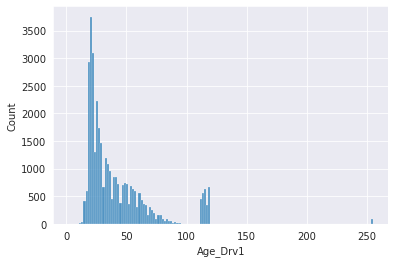

In [128]:
sns.histplot(data = no_null_vals, x = "Age_Drv1")

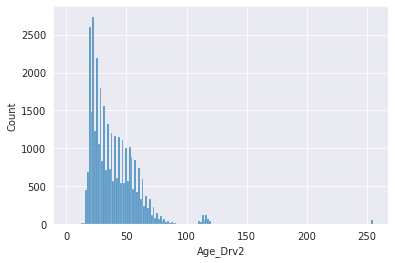

In [125]:
sns.histplot(data = no_null_vals, x = "Age_Drv2")